In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [12]:
img1=cv2.imread('sudokuu.jpg', cv2.IMREAD_GRAYSCALE)

In [13]:
th_adaptive=cv2.adaptiveThreshold(
    img1,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=13,
    C=8
)

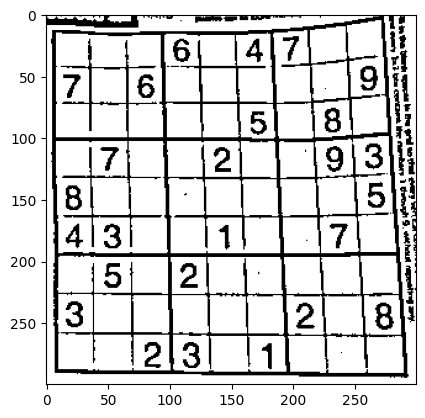

In [14]:
plt.imshow(th_adaptive, cmap='gray')

In [15]:
_, lines_thresh=cv2.threshold(
    th_adaptive,
    thresh=0,
    maxval=255,
    type=cv2.THRESH_BINARY+cv2.THRESH_OTSU
)

In [16]:
lines_edges=cv2.Canny(lines_thresh,20,50,3)

In [17]:
lines=cv2.HoughLinesP(
    lines_edges,
    1,
    np.pi/180,
    90
)

In [18]:
result_lines_img=cv2.cvtColor(th_adaptive, cv2.COLOR_GRAY2RGB)
for line in lines:
    x0, y0, x1, y1=line[0]
    cv2.line(result_lines_img, (x0,y0),(x1,y1),(0,0,255),2)

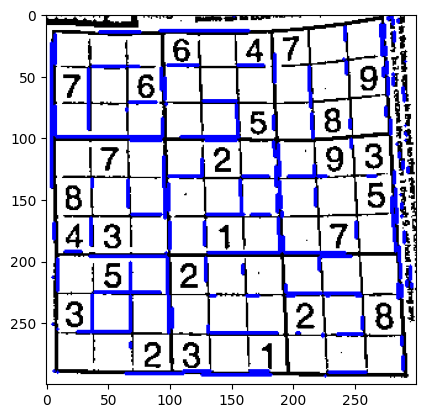

In [19]:
plt.imshow(result_lines_img)